In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


## Objectives
1. Analyse our players' performance
2. Find the best strategy to replace some of the players and bring our team the best potential possible

In [67]:
fifa_df = pd.read_csv('Fifa 23 Players Data.csv')

# Look at the data Frame

fifa_df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [68]:
fifa_df.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

## Data Cleaning & Transformation

There are many columns that are irrelevant to our analysis and objectives. We have selected only those that we considered with importance to our current analysis. These are:  'Overall', 'Potential', 'Value', 'Positions Played', 'Best Position', 'Nationality', 'Age', 'Club Name', 'Wage', 'Release Clause', 'Club Position', 'Contract Until'.  


In [69]:
fifa_players = fifa_df[['Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played','Best Position', 'Nationality', 'Age','Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until']]

# Then proceeded to create a subset considering only our team: 

AC_Milan = fifa_players[fifa_players['Club Name'] == 'AC Milan']
AC_Milan

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until
37,Mike Maignan,87,90,80000000,GK,GK,France,26,AC Milan,90000,142000000,GK,2026
86,Theo Hernández,85,90,76000000,LB,LWB,France,24,AC Milan,82000,134900000,LB,2026
128,Rafael da Conceição Leão,84,90,66500000,"LW,LM",LW,Portugal,23,AC Milan,90000,126400000,LW,2024
131,Sandro Tonali,84,90,62500000,"CDM,CM",CDM,Italy,22,AC Milan,75000,118800000,CM,2027
145,Fikayo Tomori,84,90,60500000,CB,CB,England,24,AC Milan,75000,115000000,CB,2027
222,Ismaël Bennacer,82,86,40000000,"CDM,CM",CM,Algeria,24,AC Milan,63000,71000000,CM,2024
249,Zlatan Ibrahimović,82,82,0,ST,ST,Sweden,40,AC Milan,63000,0,SUB,2023
255,Olivier Giroud,82,82,13000000,ST,ST,France,35,AC Milan,66000,22100000,ST,2023
256,Simon Kjær,82,82,14500000,CB,CB,Denmark,33,AC Milan,73000,24700000,SUB,2024
395,Davide Calabria,80,83,25500000,RB,RB,Italy,25,AC Milan,60000,45300000,RB,2025


# Selecting players to replace at this first stage

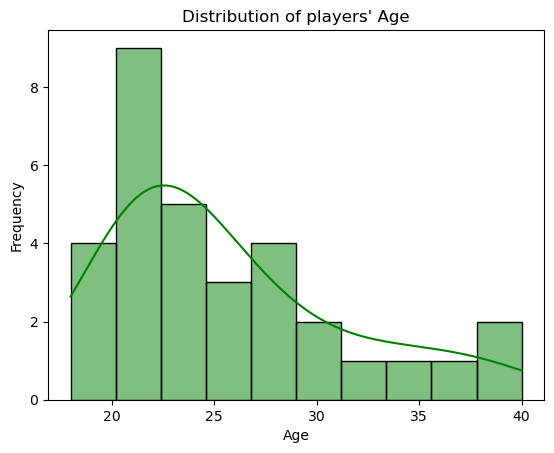

In [70]:
# Let's check age distribution in our team: 

# Create a histogram for the 'Age' feature
sns.histplot(AC_Milan['Age'], bins=10, kde=True, color='green')

# Adding more details to the plot
plt.title("Distribution of players' Age")
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

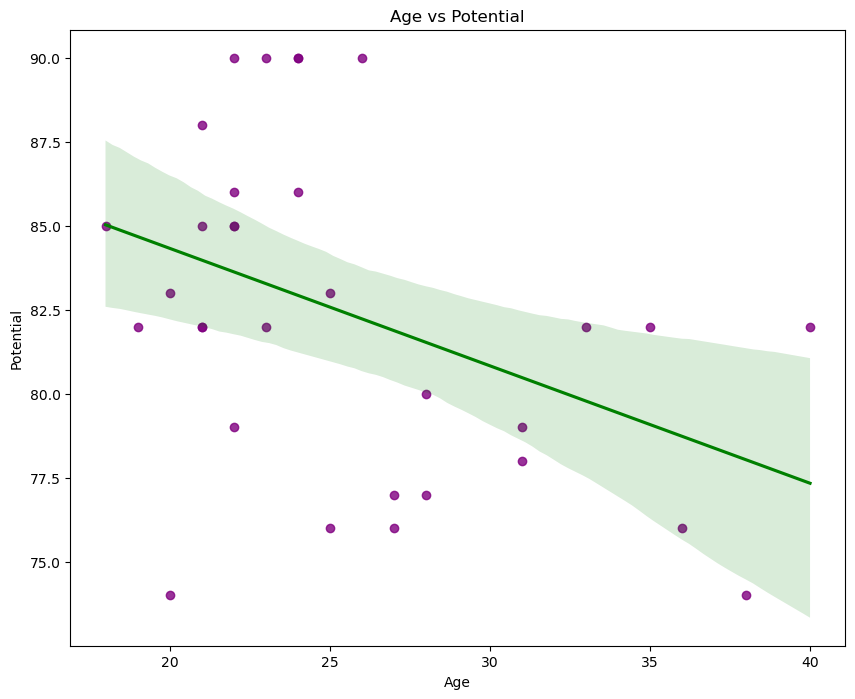

In [71]:
# Since we are looking to bring the best potential possible to our team, we will look at the potential vs Age

# Creating a scatter plot with a regression line
plt.figure(figsize=(10,8))
sns.regplot(x='Age', y='Potential', data=AC_Milan, scatter_kws={'color': 'purple'}, line_kws={'color': 'green'})
plt.title('Age vs Potential')
plt.xlabel('Age')
plt.ylabel('Potential')
plt.show()

Even though there is no perfect colinearity between the 2 variables, we can check that, in general, potential tends to decrease with age.
Based on that, and our main objective to improve potential, we decided to first focus on selling our oldest players, so we filter our AC_Milan DataFrame to find the players who are older than 30.


In [72]:
# Let's look at our players that are older than 30

to_replace = AC_Milan[AC_Milan['Age'] > 30]
to_replace


,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until
249,Zlatan Ibrahimović,82,82,0,ST,ST,Sweden,40,AC Milan,63000,0,SUB,2023
255,Olivier Giroud,82,82,13000000,ST,ST,France,35,AC Milan,66000,22100000,ST,2023
256,Simon Kjær,82,82,14500000,CB,CB,Denmark,33,AC Milan,73000,24700000,SUB,2024
642,Alessandro Florenzi,79,79,12500000,RB,RB,Italy,31,AC Milan,60000,21300000,SUB,2025
710,Junior Messias,78,78,11500000,"RW,RM",RW,Brazil,31,AC Milan,65000,19600000,RW,2024
1168,Ciprian Tătărușanu,76,76,825000,GK,GK,Romania,36,AC Milan,25000,1400000,SUB,2023
2072,Antonio Mirante,74,74,475000,GK,GK,Italy,38,AC Milan,22000,808000,RES,2023


In [73]:
# looking at the above results, on our first step and purpose of this first project, we decided to focus on replacing our 
# substitute and reserved goalkeepers given their low potential for grouth and high age
# we will after this move forward with replacement of other players:

to_replace_stage1 = to_replace[to_replace['Best Position'] == 'GK']

# let's look at the wages, release clause and value of the players to replace to have an idea on our budget for replacements

to_replace_stage1[['Full Name','Wage(in Euro)','Value(in Euro)','Release Clause','Contract Until']]


,Full Name,Wage(in Euro),Value(in Euro),Release Clause,Contract Until
1168,Ciprian Tătărușanu,25000,825000,1400000,2023
2072,Antonio Mirante,22000,475000,808000,2023


In [161]:
# Let's assume we are on 2023 for the purpose of this project
# also we assume that the team is starting off with a budget of 500 M for GK replacement from investor that is interested in 
# improving the team's potential
# Let's look at our budget:

budget_wages = to_replace_stage1['Wage(in Euro)'].sum()
budget_value = to_replace_stage1['Value(in Euro)'].sum()
budget_rc = to_replace_stage1['Release Clause'].sum()

In [162]:
budget_wages

47000

In [164]:
budget_purchase = budget_value + budget_rc
budget_purchase + 500000000 # plus the team's budget

503508000

# Searching for GK replacement

In [103]:
# Since we decided to start by replacing our SUB and RES GK, let's now go back to the original dataset and search for our replacments
fifa_players = fifa_df[['Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played','Best Position', 'Nationality', 'Age','Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until','GK Rating']]
candidates_raw = fifa_players[fifa_players['Best Position'] == 'GK']

#let's add gk rating
candidates_raw


,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,GK Rating
6,Thibaut Courtois,90,91,90000000,GK,GK,Belgium,30,Real Madrid CF,250000,191300000,GK,2026,90
7,Manuel Neuer,90,90,13500000,GK,GK,Germany,36,FC Bayern München,72000,22300000,GK,2024,90
14,Jan Oblak,89,91,85500000,GK,GK,Slovenia,29,Atlético de Madrid,100000,181700000,GK,2023,90
16,Ederson Santana de Moraes,89,91,88000000,GK,GK,Brazil,28,Manchester City,210000,169400000,GK,2026,90
18,Alisson Ramses Becker,89,90,79000000,GK,GK,Brazil,29,Liverpool,190000,152100000,GK,2027,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18508,Lalbiakhlua Jongte,48,60,100000,GK,GK,India,19,Hyderabad FC,500,155000,SUB,2023,49
18515,Xiang Gao,48,54,60000,GK,GK,China PR,21,Wuhan FC,800,105000,RES,2025,49
18520,Nikhil Deka,48,61,100000,GK,GK,India,19,NorthEast United FC,500,198000,RES,2023,49
18521,Vishal Yadav,48,62,100000,GK,GK,India,20,Jamshedpur FC,500,198000,RES,2025,49


In [107]:
# Let's filter a bit more
candidates = candidates_raw[(candidates_raw['Potential']>85)&(candidates_raw['Age']<30)&(candidates_raw['GK Rating']>80)]
candidates

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,GK Rating
14,Jan Oblak,89,91,85500000,GK,GK,Slovenia,29,Atlético de Madrid,100000,181700000,GK,2023,90
16,Ederson Santana de Moraes,89,91,88000000,GK,GK,Brazil,28,Manchester City,210000,169400000,GK,2026,90
18,Alisson Ramses Becker,89,90,79000000,GK,GK,Brazil,29,Liverpool,190000,152100000,GK,2027,90
22,Gianluigi Donnarumma,88,92,103500000,GK,GK,Italy,23,Paris Saint-Germain,110000,199200000,GK,2026,89
37,Mike Maignan,87,90,80000000,GK,GK,France,26,AC Milan,90000,142000000,GK,2026,87
165,Unai Simón Mendibil,83,86,37000000,GK,GK,Spain,25,Athletic Club de Bilbao,30000,80500000,GK,2025,85
171,Gregor Kobel,83,88,44000000,GK,GK,Switzerland,24,Borussia Dortmund,40000,78100000,GK,2026,84
235,Aaron Ramsdale,82,86,34500000,GK,GK,England,24,Arsenal,62000,68100000,GK,2025,83


In [112]:
# given their high potential for growth, rather high overall and GK rating, and lower value compared to others we will choose: 
choice_1 = candidates[candidates['Full Name']== 'Gregor Kobel']
choice_2 = candidates[candidates['Full Name']== 'Aaron Ramsdale']

display(choice_1)
display(choice_2)


,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,GK Rating
171,Gregor Kobel,83,88,44000000,GK,GK,Switzerland,24,Borussia Dortmund,40000,78100000,GK,2026,84


,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,GK Rating
235,Aaron Ramsdale,82,86,34500000,GK,GK,England,24,Arsenal,62000,68100000,GK,2025,83


In [117]:
# Money required to buy them: 
44000000 + +34500000 + 78100000 + 68100000 

# Considering our budget was : 503508000 we have enoug money for the replacement with those choices

224700000

In [141]:
# now, let's look at the correlations of these variables so that we can create a model to predict the wages.
# candidates_raw were all the players in the dataset with best position GK

goalkeepers = fifa_df[fifa_df['Best Position'] == 'GK']
goalkeepers_corr = goalkeepers.corr(numeric_only=True)



In [145]:
goalkeepers_corr['Wage(in Euro)'].sort_values(ascending=False).head(30)

Wage(in Euro)               1.000000
Value(in Euro)              0.818072
Release Clause              0.798120
International Reputation    0.613362
GK Rating                   0.568578
Overall                     0.565063
BaseStats                   0.548701
Goalkeeper Reflexes         0.541466
Dribbling Total             0.541466
Goalkeeper Handling         0.541381
Shooting Total              0.541381
Goalkeeper Diving           0.538076
Pace Total                  0.538076
Goalkeeper Positioning      0.517112
Physicality Total           0.517112
Potential                   0.495929
 GoalkeeperKicking          0.484634
Passing Total               0.484634
Shot Power                  0.483238
Reactions                   0.476254
TotalStats                  0.465008
CM Rating                   0.450389
CAM Rating                  0.447455
CDM Rating                  0.441716
RM Rating                   0.438406
LM Rating                   0.438406
RF Rating                   0.437815
L

In [158]:
# Let's standardize the features and try to predict our candidates wage and see if they are being under or over paid currenly

X = goalkeepers[['Value(in Euro)', 'Release Clause', 'GK Rating', 'Overall', 'International Reputation', 'BaseStats', 'Goalkeeper Reflexes', 'TotalStats']]
y = goalkeepers['Wage(in Euro)'] 

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Convert back to DataFrame to maintain alignment
X_standardized = pd.DataFrame(X_standardized, index=goalkeepers.index, columns=X.columns)

# Isolate specific rows for prediction: 

Gregor = X_standardized.loc[171].to_frame().T  # T (transpose) Ensures to keep DataFrame format
Aaron = X_standardized.loc[235].to_frame().T

# Remove the entries from both X and y
X_standardized = X_standardized.drop([171, 235], axis=0)
y = y.drop([171, 235])

# CReate and train the linear Regression model

model = LinearRegression()
result = model.fit(X_standardized, y)

# Predict and Evaluate the Model

predicted_wage_gregor = model.predict(Gregor)
print(f'Predicted wage for Gregor: {predicted_wage_gregor}')

# Optionally predict for Aaron
predicted_wage_aaron = model.predict(Aaron)
print(f'Predicted wage for Aaron: {predicted_wage_aaron}')

Predicted wage for Gregor: [78169.61137425]
Predicted wage for Aaron: [60970.83519836]


In [160]:
train_score = model.score(X_standardized, y)
print(f'Training Set R² Score: {train_score}')

Training Set R² Score: 0.7382713375088554


In [165]:
# We can see they are actually being under-paid based on prediction, which is good for us
# Our wage budget was short: 47000
# But considering we have investors that are interested in the improvement of the teams potential and have invested in these changes
# We will offer them a new contract with us for next season.

# Summary and Conclussions

After receiving a big investment to replace our goalkeepers in this first stage of improving our potential as a team, we decided to replace our substitute and reserved goal keepers for younger ones with better potential.
We received a 500 Million investment for this plus the money we got from selling our selected players.
We picked 2 new players to replace ours and made sure they were not being overpaid.
We discovered they are actually being underpaid based on our wage prediction, so we decided to pursue with the purchase


In [ ]:
# let's see our updated team for now: 
AC_Milan = AC_Milan.drop([1168, 2072])


In [169]:
rows_to_add = fifa_players.loc[[171, 235]]
AC_Milan = pd.concat([AC_Milan, rows_to_add], ignore_index=True)  
# Check the new state of AC_Milan
AC_Milan

,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,GK Rating
0,Mike Maignan,87,90,80000000,GK,GK,France,26,AC Milan,90000,142000000,GK,2026,NaN
1,Theo Hernández,85,90,76000000,LB,LWB,France,24,AC Milan,82000,134900000,LB,2026,NaN
2,Rafael da Conceição Leão,84,90,66500000,"LW,LM",LW,Portugal,23,AC Milan,90000,126400000,LW,2024,NaN
3,Sandro Tonali,84,90,62500000,"CDM,CM",CDM,Italy,22,AC Milan,75000,118800000,CM,2027,NaN
4,Fikayo Tomori,84,90,60500000,CB,CB,England,24,AC Milan,75000,115000000,CB,2027,NaN
5,Ismaël Bennacer,82,86,40000000,"CDM,CM",CM,Algeria,24,AC Milan,63000,71000000,CM,2024,NaN
6,Zlatan Ibrahimović,82,82,0,ST,ST,Sweden,40,AC Milan,63000,0,SUB,2023,NaN
7,Olivier Giroud,82,82,13000000,ST,ST,France,35,AC Milan,66000,22100000,ST,2023,NaN
8,Simon Kjær,82,82,14500000,CB,CB,Denmark,33,AC Milan,73000,24700000,SUB,2024,NaN
9,Davide Calabria,80,83,25500000,RB,RB,Italy,25,AC Milan,60000,45300000,RB,2025,NaN
